In [1]:
!pip install pandas
!pip install ucimlrepo
!pip install statsmodels
!pip install numpy

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_australian_credit_approval = fetch_ucirepo(id=143) 
  
# data (as pandas dataframes) 
X = statlog_australian_credit_approval.data.features 
y = statlog_australian_credit_approval.data.targets 
  
# variable information 
print(statlog_australian_credit_approval.variables)

   name     role         type demographic description units missing_values
0    A1  Feature  Categorical        None        None  None             no
1    A2  Feature   Continuous        None        None  None             no
2    A3  Feature   Continuous        None        None  None             no
3    A4  Feature  Categorical        None        None  None             no
4    A5  Feature  Categorical        None        None  None             no
5    A6  Feature  Categorical        None        None  None             no
6    A7  Feature   Continuous        None        None  None             no
7    A8  Feature  Categorical        None        None  None             no
8    A9  Feature  Categorical        None        None  None             no
9   A10  Feature   Continuous        None        None  None             no
10  A11  Feature  Categorical        None        None  None             no
11  A12  Feature  Categorical        None        None  None             no
12  A13  Feature   Contin

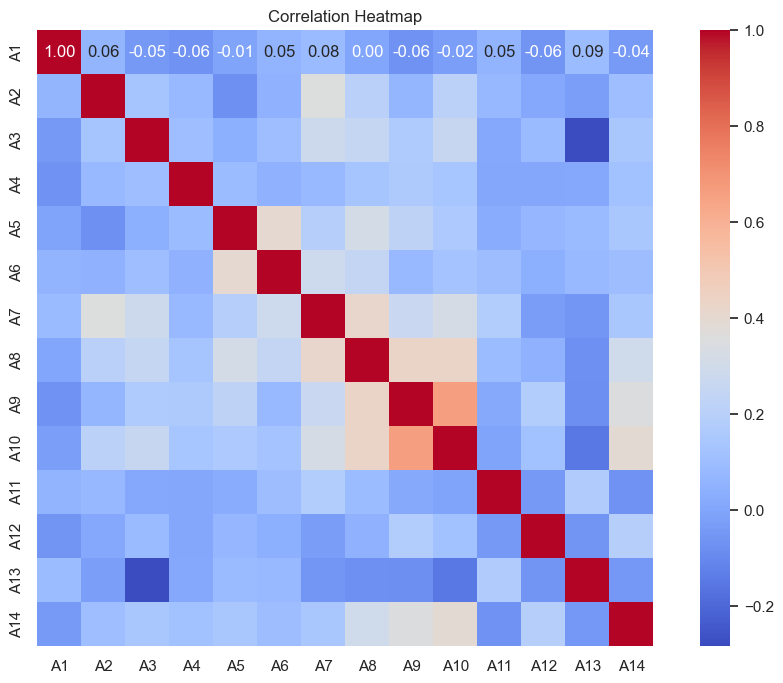

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid")

try:
    dataset = fetch_openml(name='Australian', as_frame=True, parser='pandas')
except Exception as e:
    print(f"An error occurred while fetching the dataset: {e}")
    dataset = None

if dataset is not None:
    X = dataset.data  # assuming X is the entire data frame
    correlation_matrix = X.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()


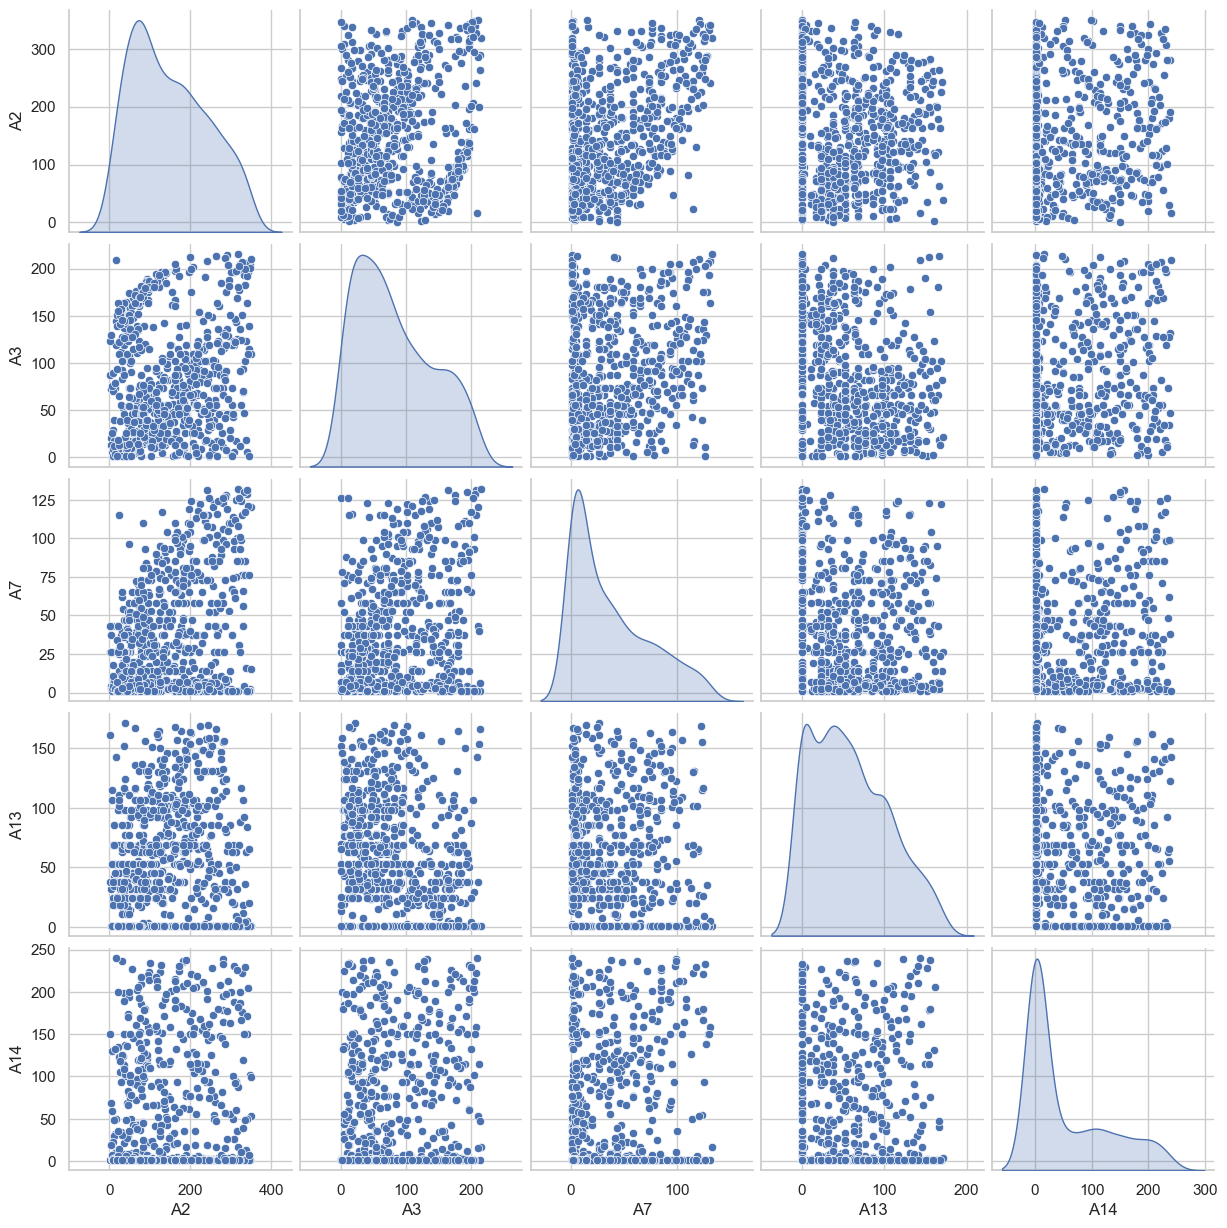

In [104]:
if dataset is not None:
    sns.pairplot(X, diag_kind='kde')
    plt.show()

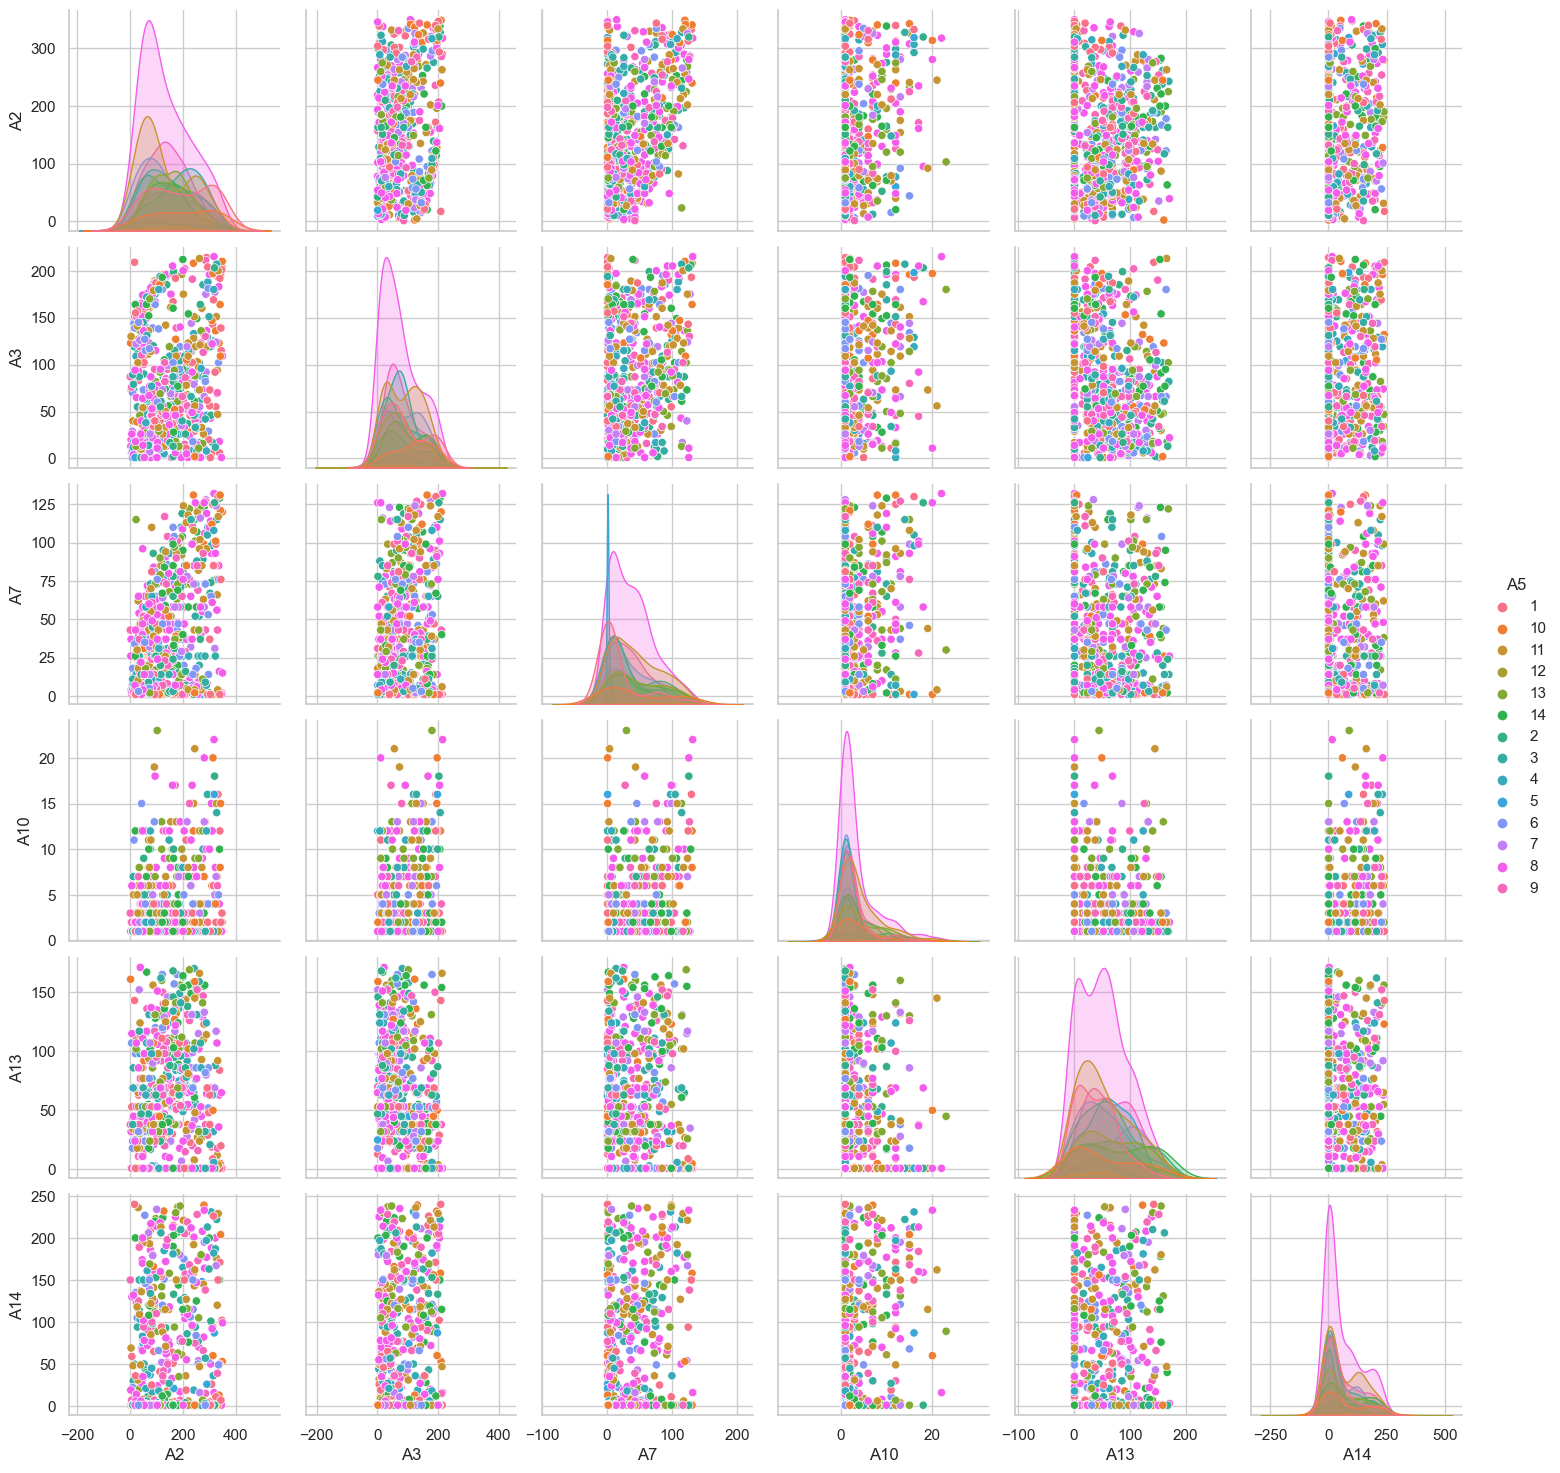

In [119]:
if dataset is not None:
    X = dataset.data
    y = dataset.target.apply(lambda x: 1 if x == '1' else 0)  # Convert target to binary

    # Including a single categorical variable A5
    sns.pairplot(X, diag_kind='kde', hue='A5')


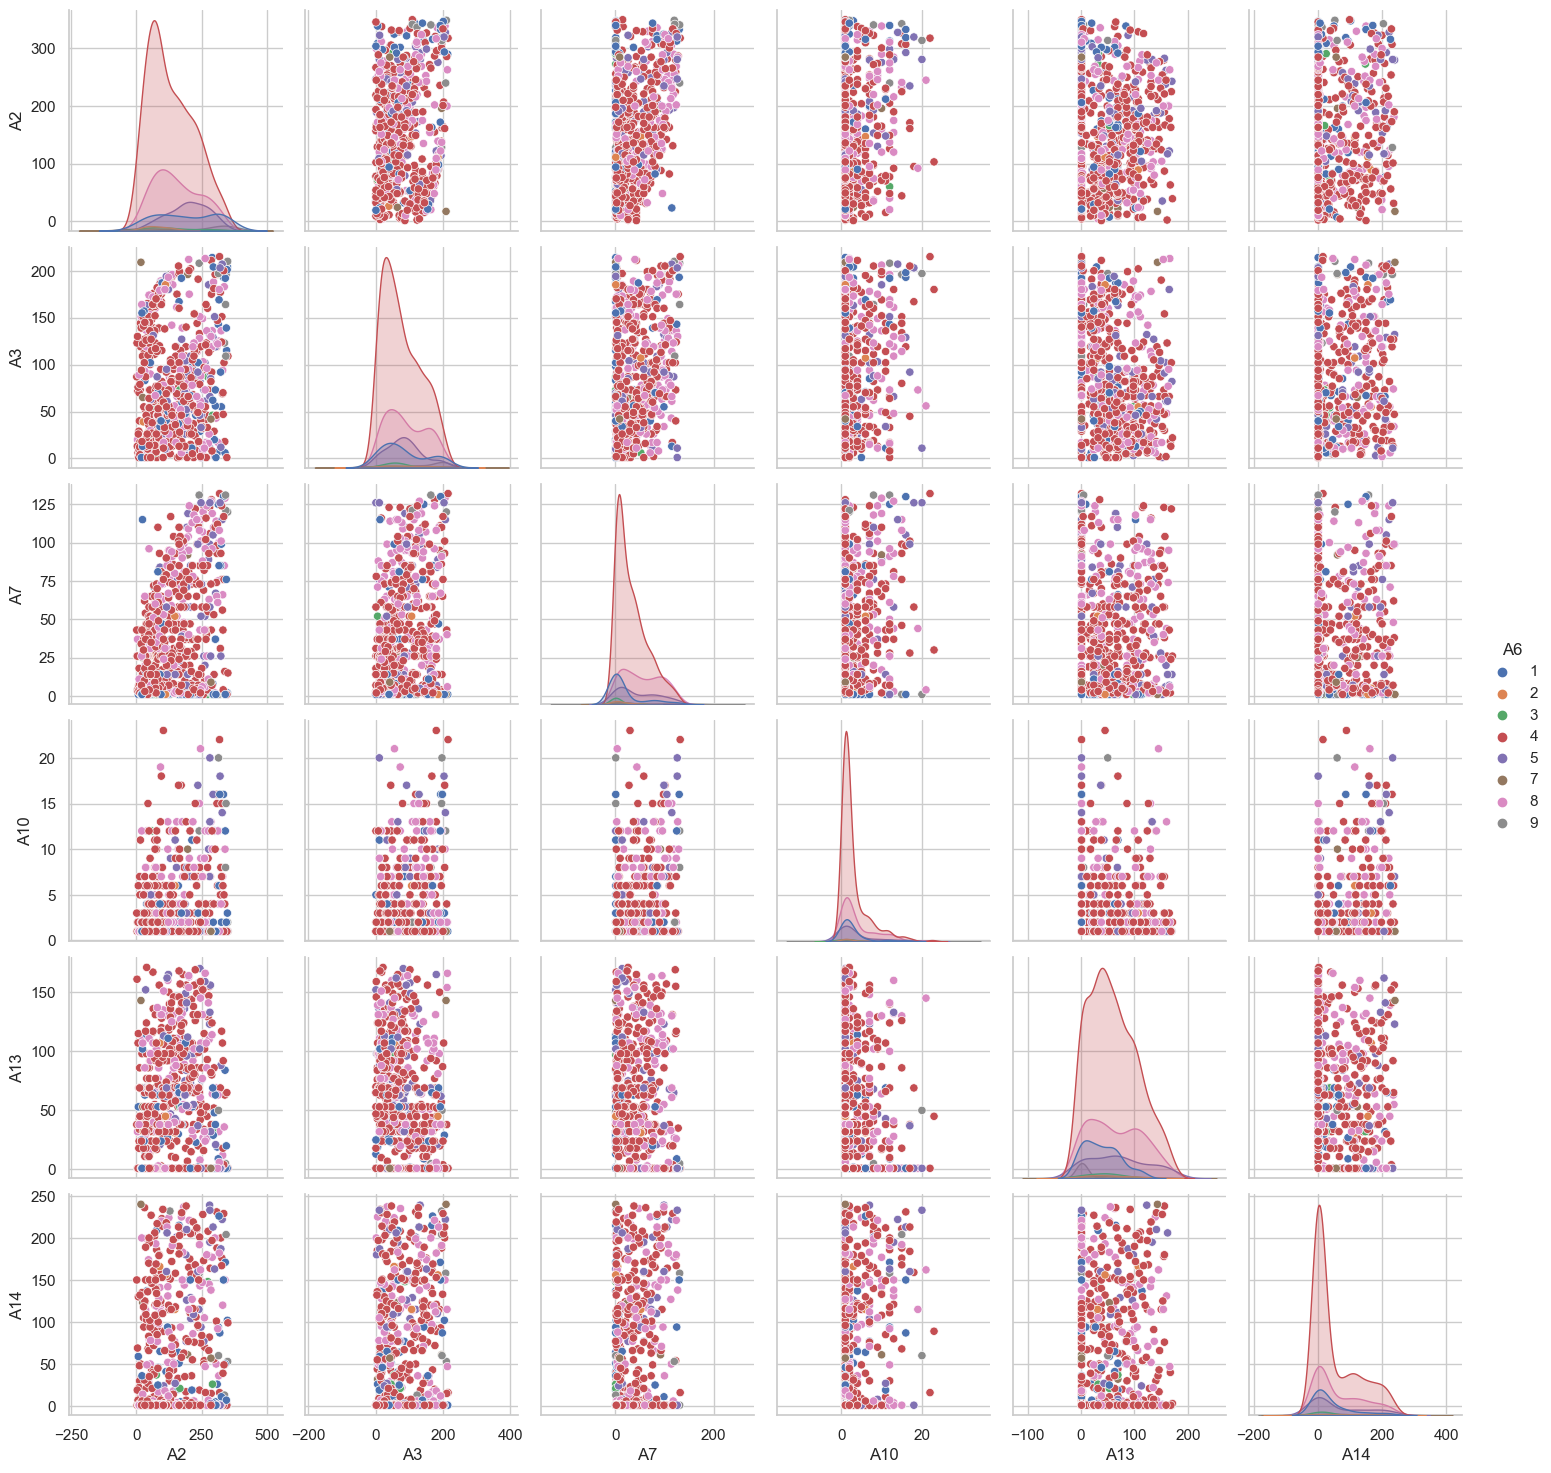

In [120]:
if dataset is not None:
    X = dataset.data
    y = dataset.target.apply(lambda x: 1 if x == '1' else 0)  # Convert target to binary

    # Including a single categorical variable A5
    sns.pairplot(X, diag_kind='kde', hue='A6')


In [122]:
if dataset is not None:
    # Define the columns
    categorical_features = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
    continuous_features = ['A2', 'A3', 'A7','A10', 'A13', 'A14']

    # Split the dataset into the features and target
    X = dataset.data[categorical_features + continuous_features]
    y = dataset.target.apply(lambda x: 1 if x == '1' else 0).astype(float)

    # Preprocess the features
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_categorical = ohe.fit_transform(X[categorical_features])
    X_categorical = pd.DataFrame(X_categorical, columns=ohe.get_feature_names_out(categorical_features))

    scaler = StandardScaler()
    X_continuous = pd.DataFrame(scaler.fit_transform(X[continuous_features]), columns=continuous_features)

    X_preprocessed = pd.concat([X_continuous, X_categorical], axis=1)

    # Add a constant to the model for the intercept
    X_preprocessed = sm.add_constant(X_preprocessed)

    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_preprocessed.values, i) for i in range(X_preprocessed.shape[1])]
    vif["features"] = X_preprocessed.columns

    print(vif.round(2))


    VIF Factor features
0        34.98    const
1         1.39       A2
2         1.32       A3
3         1.60       A7
4         2.15      A10
5         1.24      A13
6         1.31      A14
7         1.16     A1_1
8         1.11     A4_2
9         1.31     A4_3
10        8.06    A5_10
11       17.74    A5_11
12        1.89    A5_12
13       10.03    A5_13
14        9.59    A5_14
15        8.04     A5_2
16       14.32     A5_3
17       11.60     A5_4
18        3.29     A5_5
19       13.05     A5_6
20        9.82     A5_7
21       28.40     A5_8
22       15.00     A5_9
23        2.95     A6_2
24        3.13     A6_3
25       38.79     A6_4
26       13.84     A6_5
27        2.31     A6_7
28       26.29     A6_8
29        3.62     A6_9
30        1.64     A8_1
31        2.14     A9_1
32        1.13    A11_1
33        1.37    A12_2
34        1.31    A12_3


In [123]:
if dataset is not None:
    # Define the columns
    categorical_features = ['A1', 'A4', 'A5', 'A8', 'A9', 'A11', 'A12']
    continuous_features = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

    # Split the dataset into the features and target
    X = dataset.data[categorical_features + continuous_features]
    y = dataset.target.apply(lambda x: 1 if x == '1' else 0).astype(float)

    # Preprocess the features
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_categorical = ohe.fit_transform(X[categorical_features])
    X_categorical = pd.DataFrame(X_categorical, columns=ohe.get_feature_names_out(categorical_features))

    scaler = StandardScaler()
    X_continuous = pd.DataFrame(scaler.fit_transform(X[continuous_features]), columns=continuous_features)

    X_preprocessed = pd.concat([X_continuous, X_categorical], axis=1)

    # Add a constant to the model for the intercept
    X_preprocessed = sm.add_constant(X_preprocessed)

    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_preprocessed.values, i) for i in range(X_preprocessed.shape[1])]
    vif["features"] = X_preprocessed.columns

    print(vif.round(2))


    VIF Factor features
0        34.83    const
1         1.34       A2
2         1.29       A3
3         1.55       A7
4         2.13      A10
5         1.20      A13
6         1.30      A14
7         1.16     A1_1
8         1.11     A4_2
9         1.17     A4_3
10        1.48    A5_10
11        2.58    A5_11
12        1.09    A5_12
13        1.87    A5_13
14        1.85    A5_14
15        1.65     A5_2
16        2.12     A5_3
17        1.96     A5_4
18        1.21     A5_5
19        2.06     A5_6
20        1.86     A5_7
21        3.44     A5_8
22        2.26     A5_9
23        1.61     A8_1
24        2.13     A9_1
25        1.12    A11_1
26        1.35    A12_2
27        1.26    A12_3


In [124]:
if dataset is not None:
    # Define the columns
    categorical_features = ['A1', 'A4', 'A6', 'A8', 'A9', 'A11', 'A12']
    continuous_features = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

    # Split the dataset into the features and target
    X = dataset.data[categorical_features + continuous_features]
    y = dataset.target.apply(lambda x: 1 if x == '1' else 0).astype(float)

    # Preprocess the features
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_categorical = ohe.fit_transform(X[categorical_features])
    X_categorical = pd.DataFrame(X_categorical, columns=ohe.get_feature_names_out(categorical_features))

    scaler = StandardScaler()
    X_continuous = pd.DataFrame(scaler.fit_transform(X[continuous_features]), columns=continuous_features)

    X_preprocessed = pd.concat([X_continuous, X_categorical], axis=1)

    # Add a constant to the model for the intercept
    X_preprocessed = sm.add_constant(X_preprocessed)

    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_preprocessed.values, i) for i in range(X_preprocessed.shape[1])]
    vif["features"] = X_preprocessed.columns

    print(vif.round(2))


    VIF Factor features
0        33.07    const
1         1.35       A2
2         1.27       A3
3         1.56       A7
4         2.08      A10
5         1.19      A13
6         1.29      A14
7         1.07     A1_1
8         1.09     A4_2
9         1.24     A4_3
10        1.12     A6_2
11        1.15     A6_3
12        3.95     A6_4
13        2.11     A6_5
14        1.20     A6_7
15        3.32     A6_8
16        1.19     A6_9
17        1.56     A8_1
18        2.05     A9_1
19        1.11    A11_1
20        1.28    A12_2
21        1.22    A12_3


In [139]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fetch the dataset
try:
    dataset = fetch_openml(name='Australian', as_frame=True, parser='pandas')
except Exception as e:
    print(f"An error occurred: {e}")
    dataset = None

if dataset is not None:
    # Defining the columns
    categorical_features = ['A1', 'A4', 'A6', 'A8', 'A9', 'A11', 'A12']
    continuous_features = ['A2', 'A3', 'A7', 'A13', 'A14']

    # Split the dataset into the features and target
    X = dataset.data[categorical_features + continuous_features]
    y = dataset.target.apply(lambda x: 1 if x == '1' else 0).astype(float)  # Convert target variable to binary

    # Defining a preprocessor that will apply one-hot encoding to categorical features and scale continuous features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_features),
            ('num', StandardScaler(), continuous_features)
        ])

    # Applying preprocessing to the entire dataset
    X_processed = preprocessor.fit_transform(X)
    feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + continuous_features
    X_processed = pd.DataFrame(X_processed, columns=feature_names)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

    # Add a constant to the input features for statsmodels
    X_train_sm = sm.add_constant(X_train)

    # Fiting the model using GLM with a binomial family
    glm_binomial = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    result = glm_binomial.fit()

    # Applying the model to the entire dataset
    X_processed_sm = sm.add_constant(X_processed)  # Add constant to the whole dataset
    y_pred_full = result.predict(X_processed_sm) > 0.5  # Convert probabilities to 0/1 predictions

    # Evaluation on the entire dataset
    conf_matrix_full = confusion_matrix(y, y_pred_full)
    class_report_full = classification_report(y, y_pred_full)
    accuracy_full = accuracy_score(y, y_pred_full)

    # Print the summary of the model trained on the training set
    print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    A15   No. Observations:                  552
Model:                            GLM   Df Residuals:                      531
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -167.58
Date:                Sat, 13 Apr 2024   Deviance:                       335.16
Time:                        12:51:03   Pearson chi2:                     960.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5342
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8150      1.040     -5.592      0.0

In [140]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_pred_full, group_count=10):
    # Create a DataFrame for calculation
    data = pd.DataFrame({
        'y_true': y_true,
        'y_pred_full': y_pred_full
    })
    
    # Bin data into quantiles based on predicted probabilities
    data['quantile'] = pd.qcut(data['y_pred_full'], q=group_count, duplicates='drop')
    
    # Calculate observed and expected counts
    obs = data.groupby('quantile')['y_true'].agg(['count', 'sum'])
    obs.columns = ['total', 'observed_events']
    obs['observed_non_events'] = obs['total'] - obs['observed_events']
    
    # Expected events and non-events
    exp = data.groupby('quantile')['y_pred_full'].agg(['mean', 'count'])
    exp['expected_events'] = exp['mean'] * exp['count']
    exp['expected_non_events'] = (1 - exp['mean']) * exp['count']
    
    # Calculate Hosmer-Lemeshow statistic
    hl_stat = ((obs['observed_events'] - exp['expected_events'])**2 / exp['expected_events']).sum() + \
              ((obs['observed_non_events'] - exp['expected_non_events'])**2 / exp['expected_non_events']).sum()
    
    # Degrees of freedom usually equals groups - 2
    df = group_count - 2
    p_value = 1 - chi2.cdf(hl_stat, df)
    
    return hl_stat, p_value

# Example usage:
hl_stat, p_value = hosmer_lemeshow_test(y, y_pred_full, group_count=10)
print("Hosmer-Lemeshow test statistic:", hl_stat)
print("P-value:", p_value)



Hosmer-Lemeshow test statistic: 0.5835539279945197
P-value: 0.9997606021090188


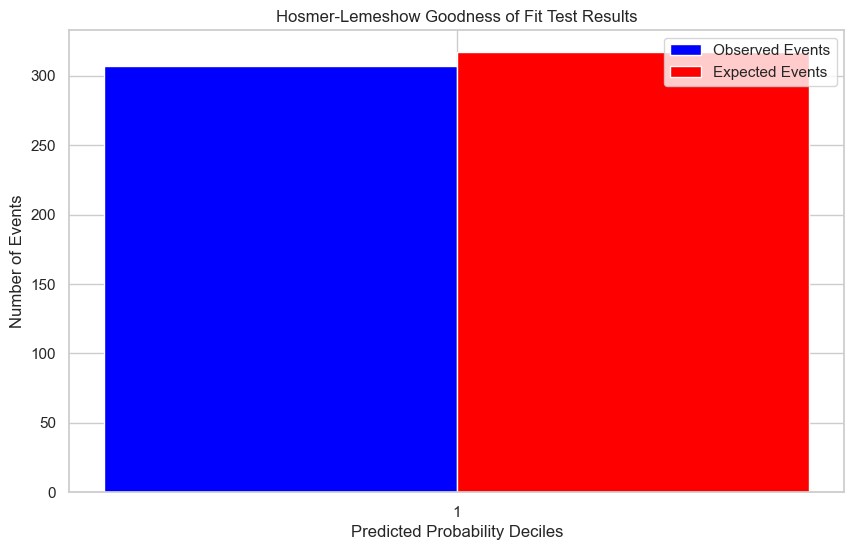

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_hosmer_lemeshow(y_true, y_pred_full, group_count=10):
    data = pd.DataFrame({
        'y_true': y_true,
        'y_pred_full': y_pred_full
    })
    # Attempt to create quantile bins
    try:
        data['quantile'] = pd.qcut(data['y_pred_full'], q=group_count, duplicates='drop')
        # Convert categorical data to numeric for plotting purposes
        data['quantile_code'] = data['quantile'].cat.codes + 1  # +1 to make it 1-based index
    except ValueError as e:
        print("Error in binning:", e)
        return

    obs = data.groupby('quantile_code')['y_true'].agg(['count', 'sum'])
    obs.columns = ['total', 'observed_events']
    obs['observed_non_events'] = obs['total'] - obs['observed_events']

    exp = data.groupby('quantile_code')['y_pred_full'].agg(['mean', 'count'])
    exp['expected_events'] = exp['mean'] * exp['count']
    exp['expected_non_events'] = (1 - exp['mean']) * exp['count']

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting observed and expected events
    ax.bar(obs.index - 0.15, obs['observed_events'], width=0.3, label='Observed Events', color='blue')
    ax.bar(exp.index + 0.15, exp['expected_events'], width=0.3, label='Expected Events', color='red')

    # Adding labels and title
    ax.set_xlabel('Predicted Probability Deciles')
    ax.set_ylabel('Number of Events')
    ax.set_title('Hosmer-Lemeshow Goodness of Fit Test Results')
    ax.set_xticks(obs.index)
    ax.set_xticklabels(obs.index)

    # Adding legend
    ax.legend()

    plt.show()

# Example usage, assuming y and y_pred_prob are defined:
plot_hosmer_lemeshow(y, y_pred_full, group_count=10)




Number of NaN residuals: 0
Number of inf residuals: 0
Number of valid residuals: 690


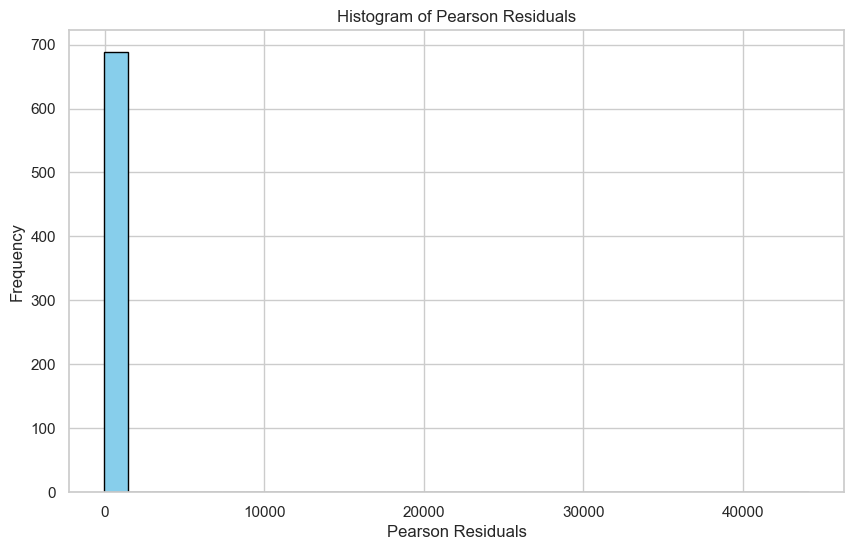

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Assuming `X_processed` and `y` are defined and `result` is your fitted model
X_processed_sm = sm.add_constant(X_processed)  # Add a constant for the intercept
result = glm_binomial.fit()

# Get the predicted probabilities, ensuring no values are exactly 0 or 1
eps = np.finfo(float).eps  # Machine epsilon for floating point type
y_pred_full = np.clip(result.predict(X_processed_sm), eps, 1 - eps)

# Calculate Pearson residuals
pearson_residuals = (y - y_pred_full) / np.sqrt(y_pred_full * (1 - y_pred_full))

# Check for any NaN or inf values in the residuals to ensure they are correct
nan_count = np.isnan(pearson_residuals).sum()
inf_count = np.isinf(pearson_residuals).sum()
valid_residuals_count = np.isfinite(pearson_residuals).sum()

print(f"Number of NaN residuals: {nan_count}")
print(f"Number of inf residuals: {inf_count}")
print(f"Number of valid residuals: {valid_residuals_count}")

# Proceed with plotting if residuals are valid
if nan_count == 0 and inf_count == 0:
    # Plotting the histogram of the Pearson Residuals
    plt.figure(figsize=(10, 6))
    plt.hist(pearson_residuals, bins=30, edgecolor='black', color='skyblue')
    plt.title('Histogram of Pearson Residuals')
    plt.xlabel('Pearson Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("Residuals contain NaN or infinity values and cannot be plotted.")


Descriptive statistics of Pearson residuals:
count      690.000000
mean        67.425683
std       1683.120208
min         -5.115503
25%         -0.206646
50%         -0.091697
75%          0.330652
max      44154.950993
dtype: float64

First few predicted probabilities and Pearson residuals:
   Predicted Probabilities  Pearson Residuals
0                 0.178532          -0.466189
1                 0.022506          -0.151736
2                 0.009892          -0.099955
3                 0.831132           0.450753
4                 0.934661           0.264400


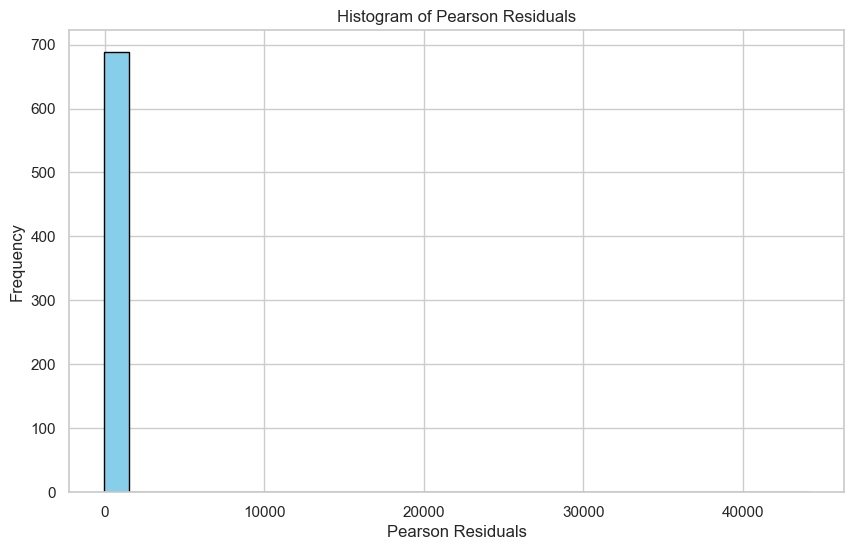

In [149]:
# Print descriptive statistics of Pearson residuals
print("Descriptive statistics of Pearson residuals:")
print(pd.Series(pearson_residuals).describe())

# Inspect the first few predicted probabilities and their corresponding residuals
print("\nFirst few predicted probabilities and Pearson residuals:")
print(pd.DataFrame({'Predicted Probabilities': y_pred_full, 'Pearson Residuals': pearson_residuals}).head())

# Adjust the histogram plotting to use a fixed number of bins or fixed bin width
plt.figure(figsize=(10, 6))
plt.hist(pearson_residuals, bins=np.linspace(np.min(pearson_residuals), np.max(pearson_residuals), 30), edgecolor='black', color='skyblue')
plt.title('Histogram of Pearson Residuals')
plt.xlabel('Pearson Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



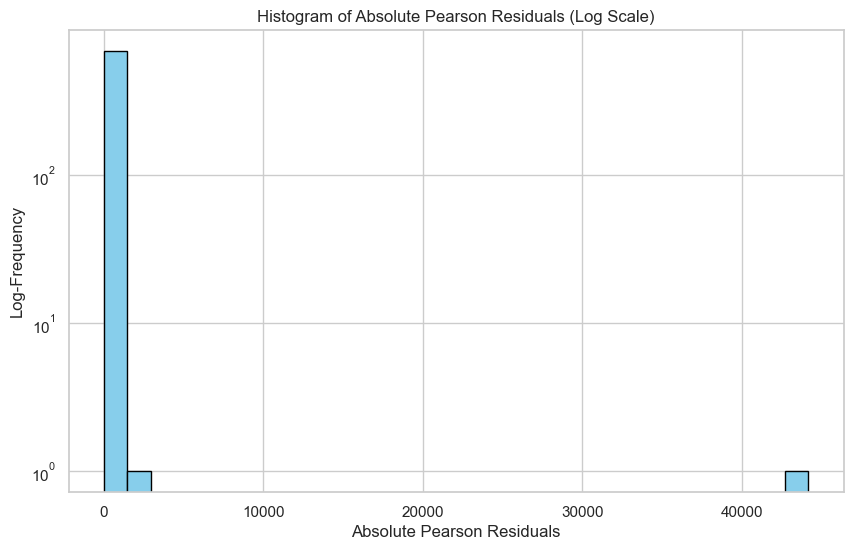

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the absolute values of the Pearson residuals
absolute_pearson_residuals = np.abs(pearson_residuals)

# Since we're plotting absolute residuals, we can now use a logarithmic scale.
# We avoid plotting zeros by only taking non-zero residuals.
non_zero_residuals = absolute_pearson_residuals[absolute_pearson_residuals > 0]

plt.figure(figsize=(10, 6))
# We use the `log=True` parameter of plt.hist to apply the logarithmic scale.
plt.hist(non_zero_residuals, bins=30, edgecolor='black', color='skyblue', log=True)
plt.title('Histogram of Absolute Pearson Residuals (Log Scale)')
plt.xlabel('Absolute Pearson Residuals')
plt.ylabel('Log-Frequency')
plt.grid(True)
plt.show()




In [128]:
# Redefine the function to calculate deviance residuals
def calculate_deviance_residuals(y, y_pred_full):
    # Ensure no exact 0 or 1 probabilities
    y_pred_full = np.clip(y_pred_full, eps, 1 - eps)
    # Calculate components of deviance residuals separately and handle y=0 and y=1 cases
    with np.errstate(divide='ignore', invalid='ignore'):
        res = np.where(y == 1,
                       np.sqrt(-2 * np.log(y_pred_full)),
                       np.sqrt(-2 * np.log(1 - y_pred_full)))
        res = np.where(y == y_pred_full, 0, res)  # If y is equal to the prediction, residual is 0
    return res

# Recalculate the residuals with the updated function
deviance_residuals = calculate_deviance_residuals(y, y_pred_full)

# Recheck for NaNs and infs in the recalculated residuals
nan_count = np.isnan(deviance_residuals).sum()
inf_count = np.isinf(deviance_residuals).sum()
valid_residuals_count = np.isfinite(deviance_residuals).sum()

print(f"Number of NaN residuals: {nan_count}")
print(f"Number of inf residuals: {inf_count}")
print(f"Number of valid residuals: {valid_residuals_count}")

if nan_count > 0 or inf_count > 0:
    print("There are still incorrectly calculated residuals.")
else:
    print("All residuals are calculated correctly now.")


Number of NaN residuals: 0
Number of inf residuals: 0
Number of valid residuals: 690
All residuals are calculated correctly now.


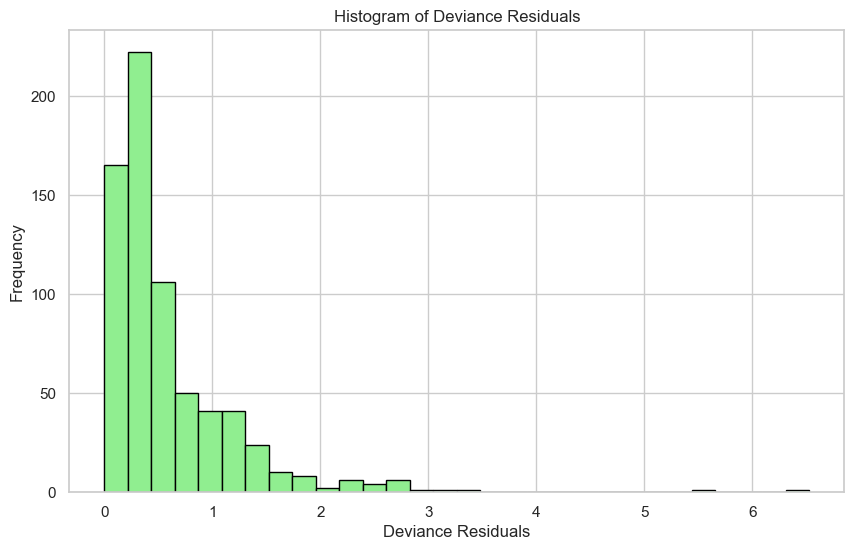

In [145]:
# Plotting the histogram of the Deviance Residuals
plt.figure(figsize=(10, 6))
plt.hist(deviance_residuals, bins=30, edgecolor='black', color='lightgreen')
plt.title('Histogram of Deviance Residuals')
plt.xlabel('Deviance Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [151]:
# Output the evaluation results on the entire dataset
print('Confusion Matrix for the entire dataset:\n', conf_matrix_full)
print('\nClassification Report for the entire dataset:\n', class_report_full)
print('\nAccuracy for the entire dataset:', accuracy_full)

Confusion Matrix for the entire dataset:
 [[334  49]
 [ 39 268]]

Classification Report for the entire dataset:
               precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       383
         1.0       0.85      0.87      0.86       307

    accuracy                           0.87       690
   macro avg       0.87      0.87      0.87       690
weighted avg       0.87      0.87      0.87       690


Accuracy for the entire dataset: 0.8724637681159421


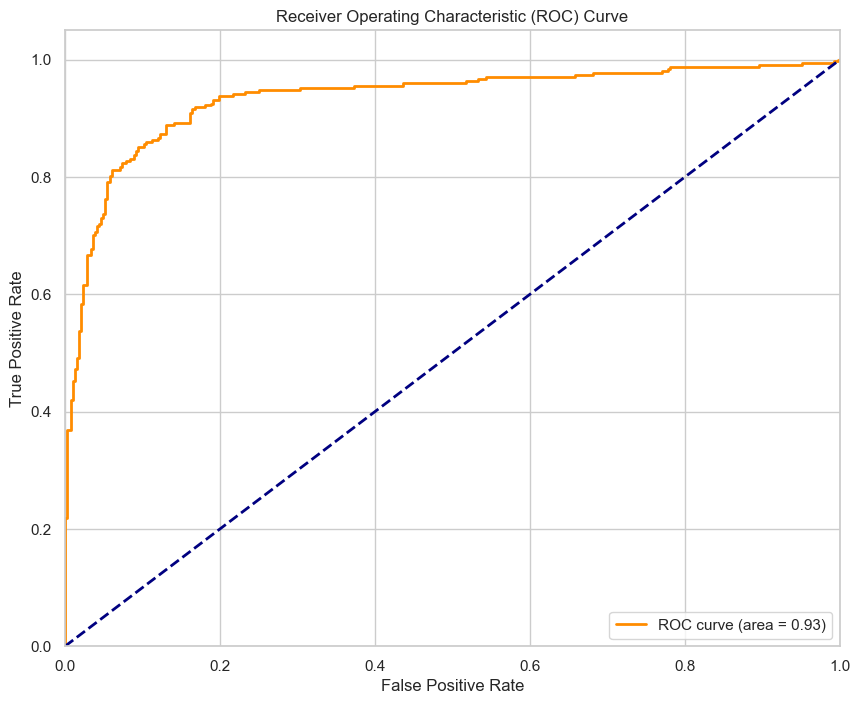

In [152]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `y` is your true binary outcomes and `y_pred_prob` are the predicted probabilities
# from your logistic regression model (make sure `y_pred_prob` is calculated as shown in previous steps)

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y, y_pred_full)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
